# Importing required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
import pandas as pd
data=pd.read_excel('Resturant Food Cost_Data_Train.xlsx')
df=pd.DataFrame(data)
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [3]:
df.shape

(12690, 9)

In [4]:
df.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [5]:
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


# EDA Process

# Checking Null Values

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df.isnull()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
12685,False,False,False,False,False,False,False,False,False
12686,False,False,False,False,False,False,False,False,False
12687,False,False,False,False,False,False,False,False,False
12688,False,False,False,False,False,False,False,False,False


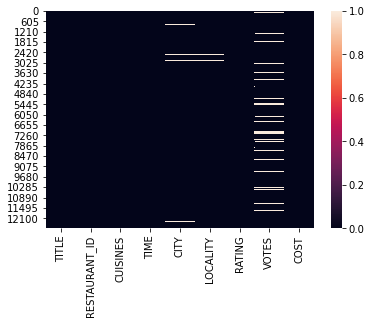

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

Observation:

There are some null values in CITY,RATING,LOCALITY and VOTES.

In [11]:
#Filling Null Values
df['CITY'].fillna(value=df['CITY'].mode()[0],inplace=True)
df['RATING'].fillna(value=df['RATING'].mode()[0],inplace=True)
df['LOCALITY'].fillna(value=df['LOCALITY'].mode()[0],inplace=True)
df['VOTES'].fillna(value=df['VOTES'].mode()[0],inplace=True)
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [12]:
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

Now, There is no null value.

In [13]:
#dropping ID column
df.drop(['RESTAURANT_ID'],axis=1,inplace=True)
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...
12685,QUICK BITES,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR","Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [14]:
# Converting VOTES Column into numeric.
for i in range(len(df)):
    df['VOTES'][i]=df['VOTES'][i][:-6]
    
df['VOTES']=df['VOTES'].astype(int)
df['VOTES']=np.int64(df['VOTES'])
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300
...,...,...,...,...,...,...,...,...
12685,QUICK BITES,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546,500
12686,"CASUAL DINING,BAR","Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214,1800
12687,LOUNGE,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608,1300
12688,CASUAL DINING,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32,400


In [15]:
df['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

Observation:
    
It has some unusal values as 'NEW' and '-'

In [16]:
#Replacing unusal Values with mode of Rating.
df['RATING']=np.where((df.RATING=='NEW'),df['RATING'].mode(),df.RATING)
df['RATING']=np.where((df.RATING=='-'),df['RATING'].mode(),df.RATING)
df['RATING']=df['RATING'].astype(float)
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300
...,...,...,...,...,...,...,...,...
12685,QUICK BITES,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546,500
12686,"CASUAL DINING,BAR","Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214,1800
12687,LOUNGE,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608,1300
12688,CASUAL DINING,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32,400


In [17]:
df.dtypes

TITLE        object
CUISINES     object
TIME         object
CITY         object
LOCALITY     object
RATING      float64
VOTES         int64
COST          int64
dtype: object

In [18]:
df.describe()

,RATING,VOTES,COST
count,12690.000000,12690.000000,12690.000000
mean,3.796320,380.405753,655.252246
std,0.402966,809.110447,627.003540
min,2.000000,4.000000,20.000000
25%,3.600000,44.000000,300.000000
50%,3.900000,132.000000,500.000000
75%,4.000000,405.000000,800.000000
max,4.900000,41186.000000,14000.000000


Observation:

There is so much differences in mean and median in VOTES column.

High Standard Deviation in VOTES and COST column.

# Data Visualization

# Univariate Analysis

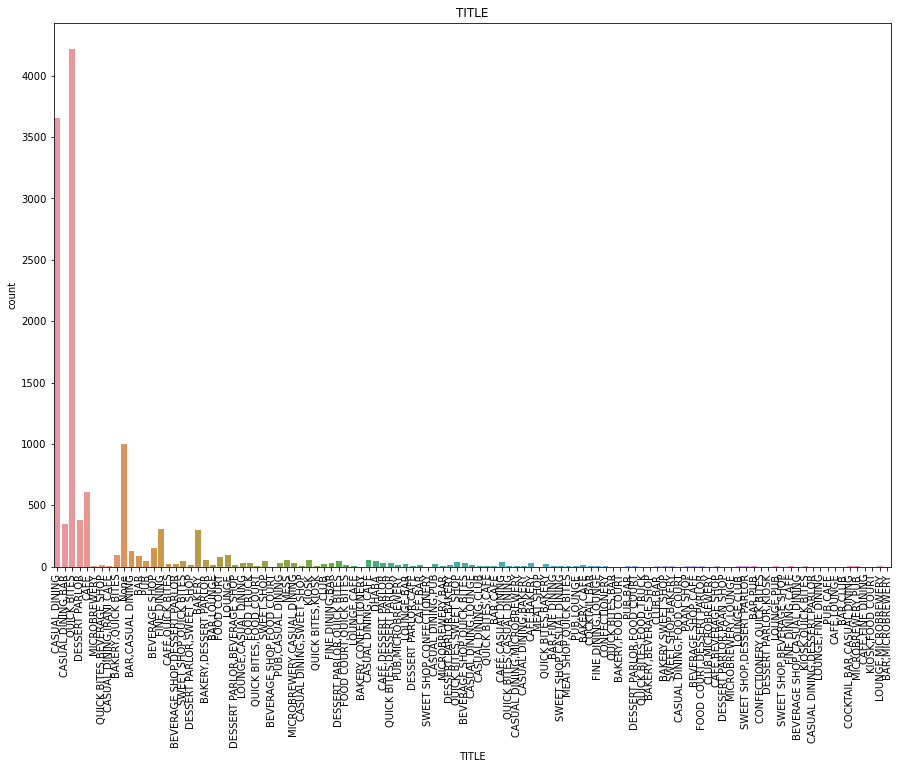

QUICK BITES                    4218
CASUAL DINING                  3652
None                           1003
CAFÉ                            607
DESSERT PARLOR                  382
                               ... 
BAR,CLUB                          1
MICROBREWERY,LOUNGE               1
DESSERT PARLOR,KIOSK              1
QUICK BITES,FOOD TRUCK            1
BEVERAGE SHOP,CASUAL DINING       1
Name: TITLE, Length: 113, dtype: int64


In [19]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x='TITLE',data=df)
plt.title('TITLE')
plt.show()
print(df['TITLE'].value_counts())

Observation:

Most of the resturants are QUICK BITES.

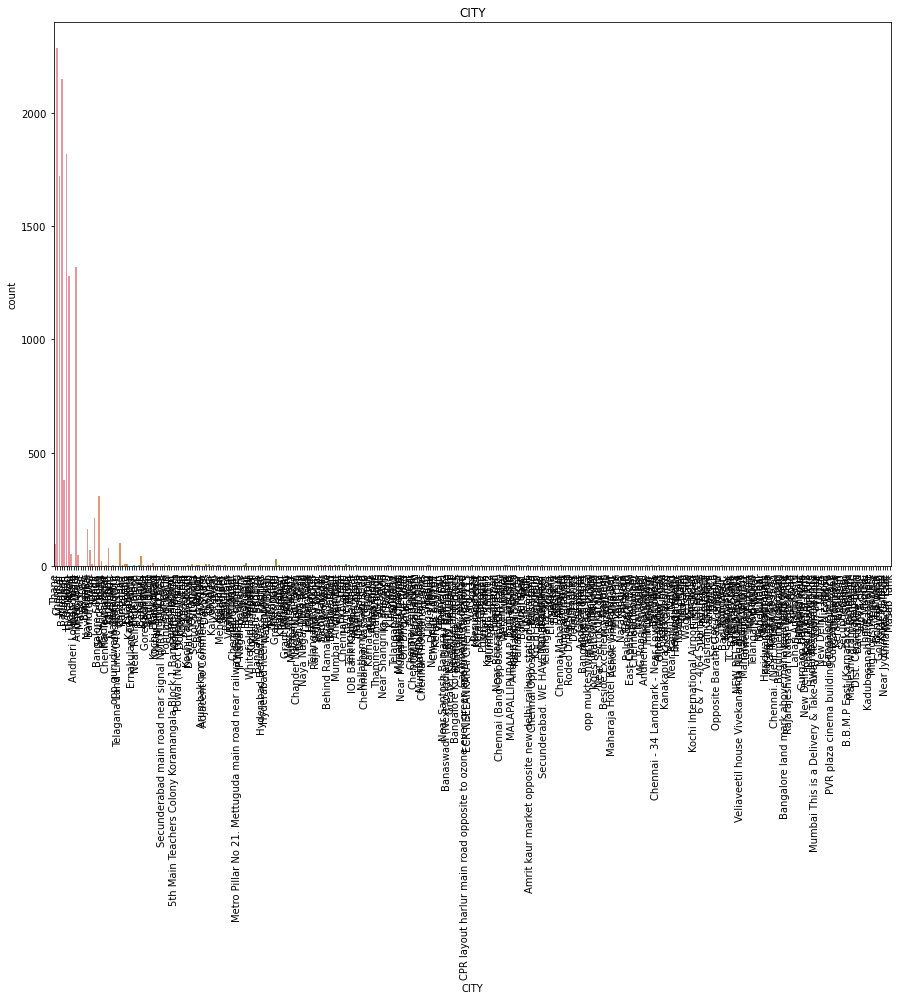

Chennai                       2286
Bangalore                     2149
Hyderabad                     1819
Mumbai                        1722
New Delhi                     1321
                              ... 
MG Road                          1
khar west                        1
Hyderabad neerus emporium.       1
Telangana 500032                 1
OMR Karapakkam                   1
Name: CITY, Length: 359, dtype: int64


In [20]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x='CITY',data=df)
plt.title('CITY')
plt.show()
print(df['CITY'].value_counts())

Observation:
    
Most Resturants are in Chennai.

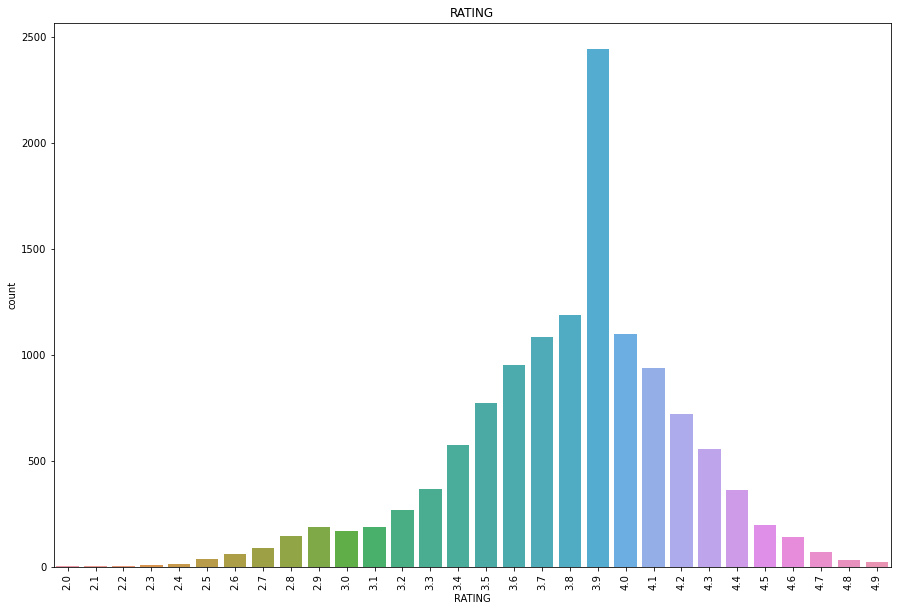

3.9    2442
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
3.4     575
4.3     556
3.3     365
4.4     362
3.2     266
4.5     199
2.9     186
3.1     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.2       2
2.0       2
Name: RATING, dtype: int64


In [21]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x='RATING',data=df)
plt.title('RATING')
plt.show()
print(df['RATING'].value_counts())

Observation:

3.9 out of 5 is the maximum rating given to the resturants.

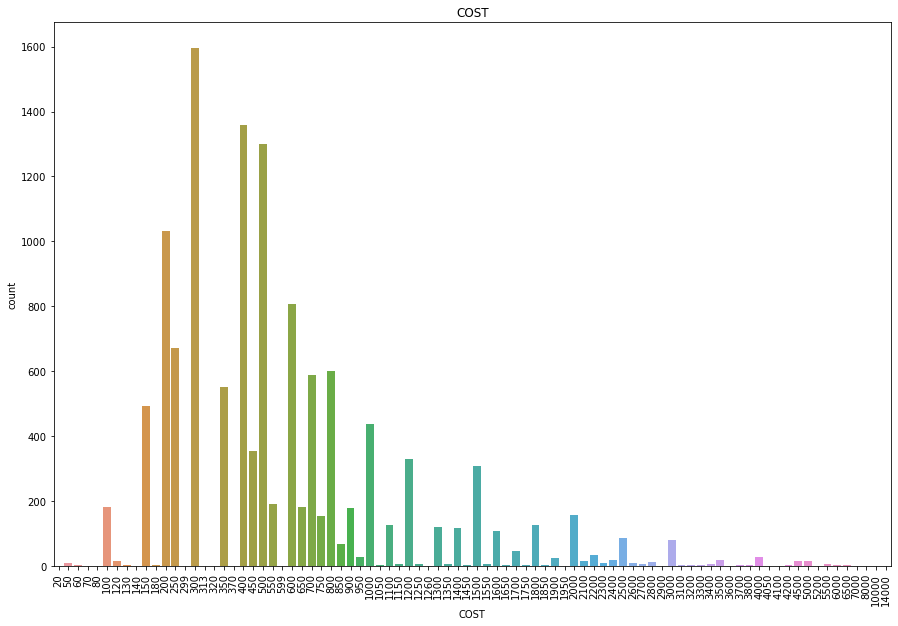

300      1595
400      1357
500      1300
200      1031
600       806
         ... 
4100        1
70          1
14000       1
1950        1
80          1
Name: COST, Length: 86, dtype: int64


In [22]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x='COST',data=df)
plt.title('COST')
plt.show()
print(df['COST'].value_counts())

Observation:

Most Foods cost 300.

# Bivariate Analysis

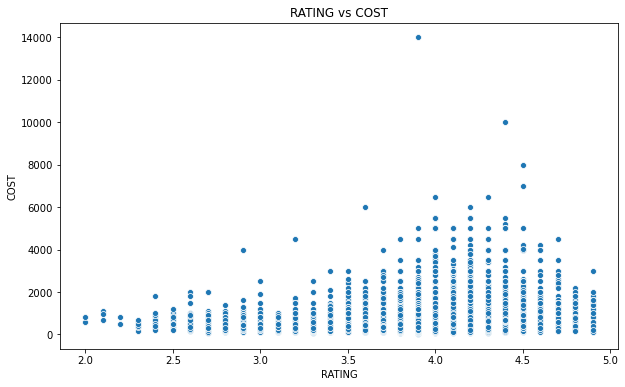

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['RATING'],y=df['COST'],data=df)
plt.title('RATING vs COST')
plt.show()

Observation:

Having Rating of 4.0-4.5, the food cost of resturants is high.

# Label Encoding

In [25]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['CITY','LOCALITY']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [26]:
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",320,285,3.6,49,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),67,1046,4.2,30,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",67,1101,3.8,221,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),222,136,4.1,24,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),222,620,3.8,165,300
...,...,...,...,...,...,...,...,...
12685,QUICK BITES,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",131,342,3.8,546,500
12686,"CASUAL DINING,BAR","Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",222,133,4.3,1214,1800
12687,LOUNGE,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),239,1342,4.0,608,1300
12688,CASUAL DINING,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),67,631,3.5,32,400


# Multivariate Analysis

# Correlation

In [27]:
df_corr=df.corr()
df_corr

,CITY,LOCALITY,RATING,VOTES,COST
CITY,1.000000,0.043072,0.059474,0.043373,0.044555
LOCALITY,0.043072,1.000000,-0.027201,-0.028965,-0.015050
RATING,0.059474,-0.027201,1.000000,0.332369,0.308018
VOTES,0.043373,-0.028965,0.332369,1.000000,0.255723
COST,0.044555,-0.015050,0.308018,0.255723,1.000000


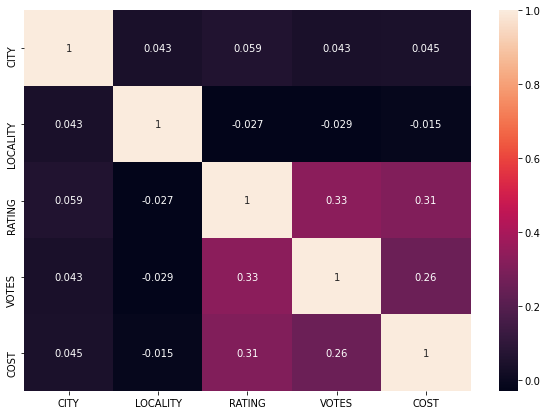

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(df_corr,annot=True)

Observation:
    
COST is correlated with RATING and VOTES.

# Extracting Multiple Values from TITLE, CUISINES and TIME Columns and Encoding

In [29]:
df['TITLE'].unique()

array(['CASUAL DINING', 'CASUAL DINING,BAR', 'QUICK BITES',
       'DESSERT PARLOR', 'CAFÉ', 'MICROBREWERY',
       'QUICK BITES,BEVERAGE SHOP', 'CASUAL DINING,IRANI CAFE',
       'BAKERY,QUICK BITES', 'None', 'BAR,CASUAL DINING', 'BAR', 'PUB',
       'BEVERAGE SHOP', 'FINE DINING', 'CAFÉ,QUICK BITES',
       'BEVERAGE SHOP,DESSERT PARLOR', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,SWEET SHOP', 'BAKERY', 'BAKERY,DESSERT PARLOR',
       'BAR,LOUNGE', 'FOOD COURT', 'LOUNGE',
       'DESSERT PARLOR,BEVERAGE SHOP', 'LOUNGE,CASUAL DINING',
       'FOOD TRUCK', 'QUICK BITES,FOOD COURT', 'SWEET SHOP',
       'BEVERAGE SHOP,FOOD COURT', 'PUB,CASUAL DINING', 'MESS',
       'MICROBREWERY,CASUAL DINING', 'CASUAL DINING,SWEET SHOP', 'KIOSK',
       'QUICK BITES,KIOSK', 'CLUB', 'FINE DINING,BAR',
       'DESSERT PARLOR,QUICK BITES', 'FOOD COURT,QUICK BITES',
       'LOUNGE,CAFÉ', 'BAKERY,CONFECTIONERY', 'CASUAL DINING,CAFÉ',
       'DHABA', 'CAFÉ,DESSERT PARLOR', 'QUICK BITES,DESSERT PARLOR'

In [30]:
df['CUISINES'].unique()

array(['Malwani, Goan, North Indian', 'Asian, Modern Indian, Japanese',
       'North Indian, Chinese, Biryani, Hyderabadi', ...,
       'North Indian, Burger, Kebab', 'Goan, Continental',
       'Finger Food, Continental, Asian, Chinese'], dtype=object)

In [31]:
df['TIME'].unique()

array(['11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)', '6pm – 11pm (Mon-Sun)',
       '11am – 3:30pm, 7pm – 11pm (Mon-Sun)', ...,
       '12:1pm – 4am (Mon-Sun)', '12:30pm – 9:45pm (Mon-Sun)',
       '12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...'], dtype=object)

Observation:

The above three columns contain so much unique values and also there are a lot of values in one value and it is hard to ditinguish one particular value for encoding.

So Let's Split each value of all the columns so that all unique values will be separated.

In [32]:
#Spliting the values
for col in ['TITLE','CUISINES','TIME']:
    df[col]=df[col].str.split(",")
    print(df[col].values)
    print("*************************************************")

[list(['CASUAL DINING']) list(['CASUAL DINING', 'BAR'])
 list(['CASUAL DINING']) ... list(['LOUNGE']) list(['CASUAL DINING'])
 list(['CASUAL DINING'])]
*************************************************
[list(['Malwani', ' Goan', ' North Indian'])
 list(['Asian', ' Modern Indian', ' Japanese'])
 list(['North Indian', ' Chinese', ' Biryani', ' Hyderabadi']) ...
 list(['Finger Food', ' Continental', ' Asian', ' Chinese'])
 list(['North Indian', ' South Indian', ' Chinese', ' Street Food'])
 list(['North Indian', ' Chinese'])]
*************************************************
[list(['11am – 4pm', ' 7:30pm – 11:30pm (Mon-Sun)'])
 list(['6pm – 11pm (Mon-Sun)'])
 list(['11am – 3:30pm', ' 7pm – 11pm (Mon-Sun)']) ...
 list(['12noon – 12:30AM (Mon-Sun)']) list(['6am – 10:45pm (Mon-Sun)'])
 list(['12:30pm – 11pm (Mon-Sun)'])]
*************************************************


In [33]:
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,[CASUAL DINING],"[Malwani, Goan, North Indian]","[11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)]",320,285,3.6,49,1200
1,"[CASUAL DINING, BAR]","[Asian, Modern Indian, Japanese]",[6pm – 11pm (Mon-Sun)],67,1046,4.2,30,1500
2,[CASUAL DINING],"[North Indian, Chinese, Biryani, Hyderabadi]","[11am – 3:30pm, 7pm – 11pm (Mon-Sun)]",67,1101,3.8,221,800
3,[QUICK BITES],"[Tibetan, Chinese]",[11:30am – 1am (Mon-Sun)],222,136,4.1,24,800
4,[DESSERT PARLOR],[Desserts],[11am – 1am (Mon-Sun)],222,620,3.8,165,300
...,...,...,...,...,...,...,...,...
12685,[QUICK BITES],"[North Indian, Burger, Kebab]","[12noon – 12midnight (Mon, Tue, Wed, Thu, ...",131,342,3.8,546,500
12686,"[CASUAL DINING, BAR]","[Goan, Continental]","[12noon – 1am (Mon-Fri), 11am – 5pm, 7pm – 1a...",222,133,4.3,1214,1800
12687,[LOUNGE],"[Finger Food, Continental, Asian, Chinese]",[12noon – 12:30AM (Mon-Sun)],239,1342,4.0,608,1300
12688,[CASUAL DINING],"[North Indian, South Indian, Chinese, Stree...",[6am – 10:45pm (Mon-Sun)],67,631,3.5,32,400


In [34]:
Title={}

for x in df['TITLE'].values:
    for each in x:
        each=each.strip()
        if each in Title:
            Title[each]+=1
        else:
            Title[each]=1
            
print(Title)

{'CASUAL DINING': 4379, 'BAR': 682, 'QUICK BITES': 4598, 'DESSERT PARLOR': 616, 'CAFÉ': 843, 'MICROBREWERY': 71, 'BEVERAGE SHOP': 249, 'IRANI CAFE': 3, 'BAKERY': 532, 'None': 1003, 'PUB': 138, 'FINE DINING': 358, 'SWEET SHOP': 155, 'LOUNGE': 201, 'FOOD COURT': 108, 'FOOD TRUCK': 31, 'MESS': 53, 'KIOSK': 60, 'CLUB': 28, 'CONFECTIONERY': 5, 'DHABA': 45, 'MEAT SHOP': 3, 'COCKTAIL BAR': 6, 'PAAN SHOP': 5}


In [35]:
Cuisines={}
for x1 in df['CUISINES'].values:
    for each1 in x1:
        each1=each1.strip()
        if each1 in Cuisines:
            Cuisines[each1]+=1
        else:
            Cuisines[each1]=1
            
print(Cuisines)

{'Malwani': 53, 'Goan': 33, 'North Indian': 5383, 'Asian': 441, 'Modern Indian': 69, 'Japanese': 139, 'Chinese': 4368, 'Biryani': 1260, 'Hyderabadi': 140, 'Tibetan': 51, 'Desserts': 1146, 'Seafood': 588, 'Cafe': 830, 'Pizza': 512, 'Burger': 364, 'Bar Food': 34, 'South Indian': 2274, 'Fast Food': 2121, 'Beverages': 967, 'Arabian': 396, 'Mughlai': 761, 'Maharashtrian': 80, 'Parsi': 19, 'Thai': 320, 'Bakery': 655, 'Momos': 383, 'Continental': 1563, 'European': 259, 'Rolls': 250, 'Andhra': 256, 'Italian': 1145, 'BBQ': 175, 'Finger Food': 277, 'Tea': 59, 'American': 302, 'Healthy Food': 219, 'Coffee': 43, 'Indonesian': 18, 'Korean': 36, 'Nepalese': 13, 'Ice Cream': 357, 'Mexican': 254, 'Kerala': 515, 'Indian': 38, 'Mithai': 189, 'Street Food': 663, 'Malaysian': 41, 'Vietnamese': 29, 'Iranian': 10, 'Kebab': 233, 'Juices': 235, 'Sandwich': 247, 'Mediterranean': 153, 'Salad': 250, 'Gujarati': 43, 'Rajasthani': 51, 'Tex-Mex': 21, 'Roast Chicken': 4, 'Burmese': 25, 'Chettinad': 134, 'North Easte

In [36]:
Time={}
for x2 in df['TIME'].values:
    for each2 in x2:
        each2=each2.strip()
        if each2 in Time:
            Time[each2]+=1
        else:
            Time[each2]=1
            
print(Time)

{'11am – 4pm': 114, '7:30pm – 11:30pm (Mon-Sun)': 18, '6pm – 11pm (Mon-Sun)': 81, '11am – 3:30pm': 84, '7pm – 11pm (Mon-Sun)': 336, '11:30am – 1am (Mon-Sun)': 32, '11am – 1am (Mon-Sun)': 114, '12noon – 12:30AM (Mon-Sun)': 54, '12noon – 11:30pm (Mon': 28, 'Tue': 308, 'Thu': 391, 'Fri': 215, 'Sat': 215, 'Sun)...': 162, '1pm – 1am (Mon-Sun)': 24, '7am – 10:30pm (Mon-Sun)': 102, '11am – 2pm': 2, '4pm – 10:30pm (Mon-Sun)': 8, '12:30pm – 12:30AM (Mon-Sun)': 26, '11am – 12:15AM (Mon': 1, 'Wed': 423, '11am – 11pm (Mon-Sun)': 1416, '11am – 11:30pm (Mon-Sun)': 143, 'Closed (Mon)': 211, '11am – 11pm (Tue-Sun)': 22, '11:30am – 11:30pm (Mon': 14, '7:30am – 12midnight (Mon-Sun)': 14, '11am – 12midnight (Mon-Sun)': 324, '11am – 11:45pm (Mon-Sun)': 8, '9am – 10pm (Tue-Sun)': 3, '9:30am – 10pm (Mon-Sun)': 14, '10:30am – 11:30pm (Mon-Sun)': 25, '11am – 3am (Mon-Sun)': 39, '12noon – 11pm (Mon-Sun)': 410, '12:30pm – 11pm (Mon-Thu)': 3, '12:30pm – 11:30pm...': 5, '12noon – 3pm': 207, '6pm – 11pm (Tue-Sun)'

In [37]:
#The Top 10 most used in TITLES
most_title=sorted(Title.items(),key=lambda x:x[1],reverse=True)[:10]
most_title

[('QUICK BITES', 4598),
 ('CASUAL DINING', 4379),
 ('None', 1003),
 ('CAFÉ', 843),
 ('BAR', 682),
 ('DESSERT PARLOR', 616),
 ('BAKERY', 532),
 ('FINE DINING', 358),
 ('BEVERAGE SHOP', 249),
 ('LOUNGE', 201)]

In [38]:
#The Top 10 most used in CUISINES
most_cuisines=sorted(Cuisines.items(),key=lambda x:x[1],reverse=True)[:10]
most_cuisines

[('North Indian', 5383),
 ('Chinese', 4368),
 ('South Indian', 2274),
 ('Fast Food', 2121),
 ('Continental', 1563),
 ('Biryani', 1260),
 ('Desserts', 1146),
 ('Italian', 1145),
 ('Beverages', 967),
 ('Cafe', 830)]

In [39]:
#The Top 10 most used in TIME
most_time=sorted(Time.items(),key=lambda x:x[1],reverse=True)[:10]
most_time

[('11am – 11pm (Mon-Sun)', 1416),
 ('12noon – 12midnight (Mon-Sun)', 490),
 ('Wed', 423),
 ('12noon – 11pm (Mon-Sun)', 410),
 ('Thu', 391),
 ('7pm – 11pm (Mon-Sun)', 336),
 ('12noon – 3:30pm', 325),
 ('11am – 12midnight (Mon-Sun)', 324),
 ('Tue', 308),
 ('Sun)', 221)]

In [40]:
final_title=[]
for t in most_title:
    final_title.append(t[0])

In [41]:
final_cuisines=[]
for c in most_cuisines:
    final_cuisines.append(c[0])

In [42]:
final_time=[]
for tt in most_time:
    final_time.append(tt[0])

In [43]:
print(final_title)

['QUICK BITES', 'CASUAL DINING', 'None', 'CAFÉ', 'BAR', 'DESSERT PARLOR', 'BAKERY', 'FINE DINING', 'BEVERAGE SHOP', 'LOUNGE']


In [44]:
print(final_cuisines)

['North Indian', 'Chinese', 'South Indian', 'Fast Food', 'Continental', 'Biryani', 'Desserts', 'Italian', 'Beverages', 'Cafe']


In [45]:
print(final_time)

['11am – 11pm (Mon-Sun)', '12noon – 12midnight (Mon-Sun)', 'Wed', '12noon – 11pm (Mon-Sun)', 'Thu', '7pm – 11pm (Mon-Sun)', '12noon – 3:30pm', '11am – 12midnight (Mon-Sun)', 'Tue', 'Sun)']


In [46]:
for t in final_title:
    df[t]=0
    
for x,y in zip(df['TITLE'].values,np.array([i for i in range(len(df))])):
    for c in x:
        c=c.strip()
        if c in final_title:
            df[c][y]=1

df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,QUICK BITES,CASUAL DINING,None,CAFÉ,BAR,DESSERT PARLOR,BAKERY,FINE DINING,BEVERAGE SHOP,LOUNGE
0,[CASUAL DINING],"[Malwani, Goan, North Indian]","[11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)]",320,285,3.6,49,1200,0,1,0,0,0,0,0,0,0,0
1,"[CASUAL DINING, BAR]","[Asian, Modern Indian, Japanese]",[6pm – 11pm (Mon-Sun)],67,1046,4.2,30,1500,0,1,0,0,1,0,0,0,0,0
2,[CASUAL DINING],"[North Indian, Chinese, Biryani, Hyderabadi]","[11am – 3:30pm, 7pm – 11pm (Mon-Sun)]",67,1101,3.8,221,800,0,1,0,0,0,0,0,0,0,0
3,[QUICK BITES],"[Tibetan, Chinese]",[11:30am – 1am (Mon-Sun)],222,136,4.1,24,800,1,0,0,0,0,0,0,0,0,0
4,[DESSERT PARLOR],[Desserts],[11am – 1am (Mon-Sun)],222,620,3.8,165,300,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,[QUICK BITES],"[North Indian, Burger, Kebab]","[12noon – 12midnight (Mon, Tue, Wed, Thu, ...",131,342,3.8,546,500,1,0,0,0,0,0,0,0,0,0
12686,"[CASUAL DINING, BAR]","[Goan, Continental]","[12noon – 1am (Mon-Fri), 11am – 5pm, 7pm – 1a...",222,133,4.3,1214,1800,0,1,0,0,1,0,0,0,0,0
12687,[LOUNGE],"[Finger Food, Continental, Asian, Chinese]",[12noon – 12:30AM (Mon-Sun)],239,1342,4.0,608,1300,0,0,0,0,0,0,0,0,0,1
12688,[CASUAL DINING],"[North Indian, South Indian, Chinese, Stree...",[6am – 10:45pm (Mon-Sun)],67,631,3.5,32,400,0,1,0,0,0,0,0,0,0,0


In [47]:
for t in final_cuisines:
    df[t]=0
    
for u,v in zip(df['TITLE'].values,np.array([i for i in range(len(df))])):
    for d in u:
        d=d.strip()
        if d in final_cuisines:
            df[d][v]=1

df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,QUICK BITES,CASUAL DINING,...,North Indian,Chinese,South Indian,Fast Food,Continental,Biryani,Desserts,Italian,Beverages,Cafe
0,[CASUAL DINING],"[Malwani, Goan, North Indian]","[11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)]",320,285,3.6,49,1200,0,1,...,0,0,0,0,0,0,0,0,0,0
1,"[CASUAL DINING, BAR]","[Asian, Modern Indian, Japanese]",[6pm – 11pm (Mon-Sun)],67,1046,4.2,30,1500,0,1,...,0,0,0,0,0,0,0,0,0,0
2,[CASUAL DINING],"[North Indian, Chinese, Biryani, Hyderabadi]","[11am – 3:30pm, 7pm – 11pm (Mon-Sun)]",67,1101,3.8,221,800,0,1,...,0,0,0,0,0,0,0,0,0,0
3,[QUICK BITES],"[Tibetan, Chinese]",[11:30am – 1am (Mon-Sun)],222,136,4.1,24,800,1,0,...,0,0,0,0,0,0,0,0,0,0
4,[DESSERT PARLOR],[Desserts],[11am – 1am (Mon-Sun)],222,620,3.8,165,300,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,[QUICK BITES],"[North Indian, Burger, Kebab]","[12noon – 12midnight (Mon, Tue, Wed, Thu, ...",131,342,3.8,546,500,1,0,...,0,0,0,0,0,0,0,0,0,0
12686,"[CASUAL DINING, BAR]","[Goan, Continental]","[12noon – 1am (Mon-Fri), 11am – 5pm, 7pm – 1a...",222,133,4.3,1214,1800,0,1,...,0,0,0,0,0,0,0,0,0,0
12687,[LOUNGE],"[Finger Food, Continental, Asian, Chinese]",[12noon – 12:30AM (Mon-Sun)],239,1342,4.0,608,1300,0,0,...,0,0,0,0,0,0,0,0,0,0
12688,[CASUAL DINING],"[North Indian, South Indian, Chinese, Stree...",[6am – 10:45pm (Mon-Sun)],67,631,3.5,32,400,0,1,...,0,0,0,0,0,0,0,0,0,0


In [48]:
for t in final_time:
    df[t]=0
    
for p,q in zip(df['TITLE'].values,np.array([i for i in range(len(df))])):
    for e in p:
        e=e.strip()
        if e in final_time:
            df[e][q]=1

df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,QUICK BITES,CASUAL DINING,...,11am – 11pm (Mon-Sun),12noon – 12midnight (Mon-Sun),Wed,12noon – 11pm (Mon-Sun),Thu,7pm – 11pm (Mon-Sun),12noon – 3:30pm,11am – 12midnight (Mon-Sun),Tue,Sun)
0,[CASUAL DINING],"[Malwani, Goan, North Indian]","[11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)]",320,285,3.6,49,1200,0,1,...,0,0,0,0,0,0,0,0,0,0
1,"[CASUAL DINING, BAR]","[Asian, Modern Indian, Japanese]",[6pm – 11pm (Mon-Sun)],67,1046,4.2,30,1500,0,1,...,0,0,0,0,0,0,0,0,0,0
2,[CASUAL DINING],"[North Indian, Chinese, Biryani, Hyderabadi]","[11am – 3:30pm, 7pm – 11pm (Mon-Sun)]",67,1101,3.8,221,800,0,1,...,0,0,0,0,0,0,0,0,0,0
3,[QUICK BITES],"[Tibetan, Chinese]",[11:30am – 1am (Mon-Sun)],222,136,4.1,24,800,1,0,...,0,0,0,0,0,0,0,0,0,0
4,[DESSERT PARLOR],[Desserts],[11am – 1am (Mon-Sun)],222,620,3.8,165,300,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,[QUICK BITES],"[North Indian, Burger, Kebab]","[12noon – 12midnight (Mon, Tue, Wed, Thu, ...",131,342,3.8,546,500,1,0,...,0,0,0,0,0,0,0,0,0,0
12686,"[CASUAL DINING, BAR]","[Goan, Continental]","[12noon – 1am (Mon-Fri), 11am – 5pm, 7pm – 1a...",222,133,4.3,1214,1800,0,1,...,0,0,0,0,0,0,0,0,0,0
12687,[LOUNGE],"[Finger Food, Continental, Asian, Chinese]",[12noon – 12:30AM (Mon-Sun)],239,1342,4.0,608,1300,0,0,...,0,0,0,0,0,0,0,0,0,0
12688,[CASUAL DINING],"[North Indian, South Indian, Chinese, Stree...",[6am – 10:45pm (Mon-Sun)],67,631,3.5,32,400,0,1,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df.drop(['TITLE','CUISINES','TIME'],axis=1,inplace=True)
df

,CITY,LOCALITY,RATING,VOTES,COST,QUICK BITES,CASUAL DINING,None,CAFÉ,BAR,...,11am – 11pm (Mon-Sun),12noon – 12midnight (Mon-Sun),Wed,12noon – 11pm (Mon-Sun),Thu,7pm – 11pm (Mon-Sun),12noon – 3:30pm,11am – 12midnight (Mon-Sun),Tue,Sun)
0,320,285,3.6,49,1200,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,67,1046,4.2,30,1500,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,67,1101,3.8,221,800,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,222,136,4.1,24,800,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,222,620,3.8,165,300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,131,342,3.8,546,500,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12686,222,133,4.3,1214,1800,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12687,239,1342,4.0,608,1300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12688,67,631,3.5,32,400,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Outliers and Skewness is no need to be entertained because most of the columns are categorical.

# Preparing Input Variable

In [50]:
x=df.drop(['COST'],axis=1)
x

,CITY,LOCALITY,RATING,VOTES,QUICK BITES,CASUAL DINING,None,CAFÉ,BAR,DESSERT PARLOR,...,11am – 11pm (Mon-Sun),12noon – 12midnight (Mon-Sun),Wed,12noon – 11pm (Mon-Sun),Thu,7pm – 11pm (Mon-Sun),12noon – 3:30pm,11am – 12midnight (Mon-Sun),Tue,Sun)
0,320,285,3.6,49,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,67,1046,4.2,30,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,67,1101,3.8,221,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,222,136,4.1,24,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,222,620,3.8,165,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,131,342,3.8,546,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12686,222,133,4.3,1214,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12687,239,1342,4.0,608,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12688,67,631,3.5,32,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Scaling the Input Data

In [51]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_x=scaler.fit_transform(x)
scaled_x=pd.DataFrame(scaled_x)
scaled_x

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,2.117762,-0.920549,-0.487207,-0.409609,-0.753801,1.377651,-0.292954,-0.266753,-0.238318,-0.225873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.897082,0.986239,1.001812,-0.433092,-0.753801,1.377651,-0.292954,-0.266753,4.196074,-0.225873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.897082,1.124048,0.009133,-0.197021,-0.753801,1.377651,-0.292954,-0.266753,-0.238318,-0.225873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.949957,-1.293888,0.753642,-0.440508,1.326611,-0.725873,-0.292954,-0.266753,-0.238318,-0.225873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.949957,-0.081161,0.009133,-0.266236,-0.753801,-0.725873,-0.292954,-0.266753,-0.238318,4.427262,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,-0.134433,-0.777728,0.009133,0.204670,1.326611,-0.725873,-0.292954,-0.266753,-0.238318,-0.225873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12686,0.949957,-1.301405,1.249982,1.030301,-0.753801,1.377651,-0.292954,-0.266753,4.196074,-0.225873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12687,1.152535,1.727906,0.505472,0.281301,-0.753801,-0.725873,-0.292954,-0.266753,-0.238318,-0.225873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12688,-0.897082,-0.053599,-0.735377,-0.430620,-0.753801,1.377651,-0.292954,-0.266753,-0.238318,-0.225873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Preparing Target Variable

In [52]:
y=pd.DataFrame(df['COST'])
y

,COST
0,1200
1,1500
2,800
3,800
4,300
...,...
12685,500
12686,1800
12687,1300
12688,400


# Target Variables are continous values. So the model will be a regression type.

# Finding Best Random State

In [53]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
best_r_state=0
accu=0

for i in range(30,200):
    train_x,test_x,train_y,test_y=train_test_split(scaled_x,y,test_size=0.30,random_state=i)
    mod=LinearRegression()
    mod.fit(train_x,train_y)
    pred_y=mod.predict(test_x)
    tempaccu=r2_score(test_y,pred_y)
    if tempaccu>accu:
        accu=tempaccu
        best_r_state=i

print(f"Best random_state {best_r_state}")

Best random_state 178


# Multiple Algorithms

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

train_x,test_x,train_y,test_y=train_test_split(scaled_x,y,test_size=0.30,random_state=178)
model=[LinearRegression(),KNeighborsRegressor(),SVR(),RandomForestRegressor(),AdaBoostRegressor(),
       GradientBoostingRegressor(),Lasso(),Ridge(),ElasticNet()]

for m in model:
    m.fit(train_x,train_y)
    m_y=m.predict(test_x)
    print("Score of Model",m,"is",m.score(train_x,train_y))
    print("\nError")
    print("Mean Absolute Error", mean_absolute_error(test_y,m_y))
    print("Root Mean Squared Error", (mean_squared_error(test_y,m_y))**0.5 )
    print("r2_Score",r2_score(test_y,m_y))
    print("*******************************************************************")
    print("\n\n")

Score of Model LinearRegression() is 0.6078482982510407

Error
Mean Absolute Error 221.0120245398113
Root Mean Squared Error 343.3171295613056
r2_Score 0.6755516526985295
*******************************************************************



Score of Model KNeighborsRegressor() is 0.7449822419780745

Error
Mean Absolute Error 214.7064355135277
Root Mean Squared Error 351.54904799217996
r2_Score 0.6598061383464096
*******************************************************************



Score of Model SVR() is 0.16677002414232023

Error
Mean Absolute Error 277.97212204900023
Root Mean Squared Error 541.3376131591003
r2_Score 0.193339059875958
*******************************************************************



Score of Model RandomForestRegressor() is 0.9444132117402902

Error
Mean Absolute Error 209.78023902913912
Root Mean Squared Error 343.0874383333762
r2_Score 0.67598564217149
*******************************************************************



Score of Model AdaBoostRegressor() i

GradientBoostingRegressor has the highest Accuracy of 71.86%

In [90]:
gbr=GradientBoostingRegressor()
gbr.fit(train_x,train_y)
gbr.score(train_x,train_y)
gbr_y=gbr.predict(test_x)
print("Score of Model is",gbr.score(train_x,train_y))
print("Mean Absolute Error", mean_absolute_error(test_y,gbr_y))
print("Root Mean Squared Error", (mean_squared_error(test_y,gbr_y))**0.5 )
print("Accuracy of the Model is",r2_score(test_y,gbr_y))

Score of Model is 0.7062749577400738
Mean Absolute Error 199.32069213660483
Root Mean Squared Error 319.775257758715
Accuracy of the Model is 0.7185220780954511


# Loading Test Data

In [55]:
data_test=pd.read_excel('Resturant Food Cost_Data_Test.xlsx')
df_test=pd.DataFrame(data_test)
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


# EDA of Test Data

In [56]:
df_test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [57]:
#Filling Null Values
df_test['CITY'].fillna(value=df_test['CITY'].mode()[0],inplace=True)
df_test['RATING'].fillna(value=df_test['RATING'].mode()[0],inplace=True)
df_test['LOCALITY'].fillna(value=df_test['LOCALITY'].mode()[0],inplace=True)
df_test['VOTES'].fillna(value=df_test['VOTES'].mode()[0],inplace=True)
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,6 votes


In [58]:
df_test.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

In [59]:
#dropping ID column
df_test.drop(['RESTAURANT_ID'],axis=1,inplace=True)
df_test

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...
4226,CASUAL DINING,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,6 votes


In [60]:
# Converting VOTES Column into numeric.
for i in range(len(df_test)):
    df_test['VOTES'][i]=df_test['VOTES'][i][:-6]
    
df_test['VOTES']=df_test['VOTES'].astype(int)
df_test['VOTES']=np.int64(df_test['VOTES'])
df_test

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564
1,QUICK BITES,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61
2,CASUAL DINING,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350
3,None,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445
4,QUICK BITES,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23
...,...,...,...,...,...,...,...
4226,CASUAL DINING,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287
4227,None,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469
4228,QUICK BITES,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53
4229,QUICK BITES,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,6


In [61]:
df_test['RATING'].unique()

array(['4.3', '4.2', '3.8', '3.6', '3.7', 'NEW', '4.0', '3.4', '3.2',
       '4.1', '3.0', '-', '3.5', '4.5', '3.9', '3.3', '2.9', '3.1', '2.5',
       '2.8', '4.6', '4.4', '2.7', '4.8', '2.6', '4.9', '2.1', '4.7',
       '2.3', '2.4', '2.2'], dtype=object)

In [62]:
#Replacing unusal Values with mode of Rating.
df_test['RATING']=np.where((df_test.RATING=='NEW'),df['RATING'].mode(),df_test.RATING)
df_test['RATING']=np.where((df_test.RATING=='-'),df['RATING'].mode(),df_test.RATING)
df_test['RATING']=df_test['RATING'].astype(float)

In [63]:
df_test.dtypes

TITLE        object
CUISINES     object
TIME         object
CITY         object
LOCALITY     object
RATING      float64
VOTES         int64
dtype: object

# Label Encoding

In [64]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['CITY','LOCALITY']
for val in list1:
    df_test[val]=le.fit_transform(df_test[val].astype(str))

In [65]:
df_test

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),110,662,4.3,564
1,QUICK BITES,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),96,221,4.2,61
2,CASUAL DINING,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),96,411,3.8,350
3,None,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",41,456,3.8,1445
4,QUICK BITES,"South Indian, Kerala",11am – 10pm (Mon-Sun),78,300,3.6,23
...,...,...,...,...,...,...,...
4226,CASUAL DINING,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),108,597,3.9,287
4227,None,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),9,237,4.3,469
4228,QUICK BITES,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),41,696,3.7,53
4229,QUICK BITES,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",78,332,3.9,6


# Doing Same Operations for TITLE,CUISINES and TIME columns as done in Train Data

In [66]:
df_test['TITLE'].unique()

array(['CASUAL DINING', 'QUICK BITES', 'None',
       'FOOD TRUCK,DESSERT PARLOR', 'DESSERT PARLOR,QUICK BITES',
       'CASUAL DINING,BAR', 'LOUNGE', 'BEVERAGE SHOP',
       'CASUAL DINING,PUB', 'DESSERT PARLOR', 'PUB', 'CAFÉ', 'BAKERY',
       'LOUNGE,BAR', 'BAKERY,QUICK BITES', 'SWEET SHOP',
       'SWEET SHOP,QUICK BITES', 'BEVERAGE SHOP,QUICK BITES',
       'CAFÉ,QUICK BITES', 'DHABA', 'QUICK BITES,DESSERT PARLOR',
       'FINE DINING', 'IRANI CAFE,BAKERY', 'PUB,CASUAL DINING',
       'BAKERY,CASUAL DINING', 'BAR', 'FOOD COURT',
       'QUICK BITES,SWEET SHOP', 'CAFÉ,BAR', 'BAR,PUB',
       'BAKERY,DESSERT PARLOR', 'KIOSK', 'CAFÉ,BAKERY',
       'CASUAL DINING,BAKERY', 'BAKERY,CAFÉ', 'CASUAL DINING,CAFÉ',
       'QUICK BITES,CAFÉ', 'MESS', 'BAR,CASUAL DINING',
       'BEVERAGE SHOP,CAFÉ', 'BEVERAGE SHOP,DESSERT PARLOR',
       'PUB,FINE DINING', 'CASUAL DINING,FOOD COURT',
       'CAFÉ,CASUAL DINING', 'LOUNGE,CASUAL DINING',
       'DESSERT PARLOR,CAFÉ', 'FINE DINING,BAR',
       

In [67]:
df_test['CUISINES'].unique()

array(['North Indian, Chinese, Mughlai, Kebab',
       'South Indian, Fast Food, Pizza, North Indian',
       'North Indian, Seafood, Biryani, Chinese', ...,
       'North Indian, Chinese, Kebab, Juices', 'Sindhi, Street Food',
       'Rolls, Beverages'], dtype=object)

In [68]:
df_test['TIME'].unique()

array(['12noon – 12midnight (Mon-Sun)', '7am – 12:30AM (Mon-Sun)',
       '11am – 11:30pm (Mon-Sun)', ...,
       '12noon – 4pm, 7pm – 10:30pm (Mon-Sat),12noon –...',
       '6am – 12:30AM (Mon, Tue, Wed, Thu, Sat, Sun), 6am...',
       '11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun), 3pm...'],
      dtype=object)

In [69]:
#Spliting the values
for col in ['TITLE','CUISINES','TIME']:
    df_test[col]=df_test[col].str.split(",")
    print(df_test[col].values)
    print("*************************************************")

[list(['CASUAL DINING']) list(['QUICK BITES']) list(['CASUAL DINING']) ...
 list(['QUICK BITES']) list(['QUICK BITES']) list(['QUICK BITES'])]
*************************************************
[list(['North Indian', ' Chinese', ' Mughlai', ' Kebab'])
 list(['South Indian', ' Fast Food', ' Pizza', ' North Indian'])
 list(['North Indian', ' Seafood', ' Biryani', ' Chinese']) ...
 list(['Continental', ' North Indian']) list(['Rolls', ' Beverages'])
 list(['Mughlai'])]
*************************************************
[list(['12noon – 12midnight (Mon-Sun)']) list(['7am – 12:30AM (Mon-Sun)'])
 list(['11am – 11:30pm (Mon-Sun)']) ...
 list(['9:30am – 10:30pm (Mon-Sun)'])
 list(['11am – 11:30pm (Mon', ' Tue', ' Wed', ' Thu', ' Sat', ' Sun)', ' 3pm...'])
 list(['5pm – 1am (Mon-Sun)'])]
*************************************************


In [70]:
df_test

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,[CASUAL DINING],"[North Indian, Chinese, Mughlai, Kebab]",[12noon – 12midnight (Mon-Sun)],110,662,4.3,564
1,[QUICK BITES],"[South Indian, Fast Food, Pizza, North Indian]",[7am – 12:30AM (Mon-Sun)],96,221,4.2,61
2,[CASUAL DINING],"[North Indian, Seafood, Biryani, Chinese]",[11am – 11:30pm (Mon-Sun)],96,411,3.8,350
3,[None],[Biryani],"[9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun...",41,456,3.8,1445
4,[QUICK BITES],"[South Indian, Kerala]",[11am – 10pm (Mon-Sun)],78,300,3.6,23
...,...,...,...,...,...,...,...
4226,[CASUAL DINING],"[North Indian, Mughlai, Chinese]",[11:30am – 11:30pm (Mon-Sun)],108,597,3.9,287
4227,[None],"[Biryani, North Indian, Sandwich, Salad, W...",[11am – 1am (Mon-Sun)],9,237,4.3,469
4228,[QUICK BITES],"[Continental, North Indian]",[9:30am – 10:30pm (Mon-Sun)],41,696,3.7,53
4229,[QUICK BITES],"[Rolls, Beverages]","[11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, ...",78,332,3.9,6


In [71]:
Title_test={}

for x in df_test['TITLE'].values:
    for each in x:
        each=each.strip()
        if each in Title_test:
            Title_test[each]+=1
        else:
            Title_test[each]=1
            
print(Title_test)

{'CASUAL DINING': 1486, 'QUICK BITES': 1546, 'None': 284, 'FOOD TRUCK': 8, 'DESSERT PARLOR': 179, 'BAR': 218, 'LOUNGE': 62, 'BEVERAGE SHOP': 82, 'PUB': 51, 'CAFÉ': 297, 'BAKERY': 175, 'SWEET SHOP': 63, 'DHABA': 16, 'FINE DINING': 110, 'IRANI CAFE': 2, 'FOOD COURT': 36, 'KIOSK': 20, 'MESS': 15, 'MICROBREWERY': 27, 'CLUB': 11, 'COCKTAIL BAR': 1, 'MEAT SHOP': 1, 'CONFECTIONERY': 1, 'PAAN SHOP': 1, 'BHOJANALYA': 1}


In [72]:
Cuisines_test={}
for x1 in df_test['CUISINES'].values:
    for each1 in x1:
        each1=each1.strip()
        if each1 in Cuisines_test:
            Cuisines_test[each1]+=1
        else:
            Cuisines_test[each1]=1
            
print(Cuisines_test)

{'North Indian': 1839, 'Chinese': 1481, 'Mughlai': 268, 'Kebab': 76, 'South Indian': 760, 'Fast Food': 745, 'Pizza': 188, 'Seafood': 180, 'Biryani': 423, 'Kerala': 206, 'Ice Cream': 107, 'Desserts': 361, 'Street Food': 218, 'French': 14, 'Finger Food': 97, 'Continental': 532, 'BBQ': 40, 'Rolls': 98, 'Momos': 110, 'Beverages': 319, 'Italian': 391, 'Mexican': 91, 'American': 86, 'Andhra': 71, 'Asian': 159, 'European': 67, 'Cafe': 285, 'Bakery': 219, 'Mediterranean': 49, 'Chettinad': 28, 'Arabian': 138, 'Drinks Only': 3, 'Burger': 129, 'Mithai': 68, 'Bengali': 29, 'Japanese': 51, 'Sushi': 21, 'Modern Indian': 18, 'Bubble Tea': 5, 'Hyderabadi': 40, 'Burmese': 7, 'Sandwich': 76, 'Thai': 107, 'Indian': 18, 'Gujarati': 8, 'Salad': 88, 'Lucknowi': 7, '': 46, 'Healthy Food': 71, 'Juices': 90, 'Malwani': 21, 'North Eastern': 4, 'Iranian': 5, 'Parsi': 9, 'Maharashtrian': 15, 'Konkan': 7, 'Mangalorean': 13, 'Lebanese': 50, 'Afghan': 9, 'African': 2, 'Portuguese': 2, 'Middle Eastern': 9, 'Tea': 20,

In [73]:
Time_test={}
for x2 in df_test['TIME'].values:
    for each2 in x2:
        each2=each2.strip()
        if each2 in Time_test:
            Time_test[each2]+=1
        else:
            Time_test[each2]=1
            
print(Time_test)

{'12noon – 12midnight (Mon-Sun)': 150, '7am – 12:30AM (Mon-Sun)': 4, '11am – 11:30pm (Mon-Sun)': 53, '9am – 10pm (Mon': 1, 'Wed': 141, 'Thu': 127, 'Fri': 71, 'Sat': 66, 'Sun)': 72, '10:39am...': 1, '11am – 10pm (Mon-Sun)': 47, '2pm – 12midnight (Mon)': 1, '1pm – 12:30AM (Tue-Sun)': 1, '12noon – 3:30pm': 114, '7pm – 11:30pm (Mon-Sun)': 53, '7pm – 10pm (Mon-Sun)': 5, '11am – 11pm (Mon-Sun)': 447, 'Not Available': 25, '11am – 11pm (Mon)': 3, '10:30am – 11pm (Tue-Fri)': 1, '10am...': 3, '11am – 10:30pm (Mon-Sun)': 27, '7pm – 1am (Mon-Sun)': 8, '5pm – 11:30pm (Mon-Thu)': 1, '5pm – 1am (Fri-Sun)': 1, '10am – 11pm (Mon-Sun)': 74, '12noon – 4pm': 67, '7pm – 11pm (Mon-Sun)': 105, '6pm – 1am (Mon)': 1, '12noon – 3pm': 72, '6:30pm – 1am...': 1, '11am – 12midnight (Mon-Sun)': 112, '7am – 12noon': 4, '4pm – 9:30pm (Mon': 1, 'Fri...': 9, '9:30am – 11pm (Mon-Sun)': 10, '7:30am – 10:30pm (Mon-Sun)': 16, '12noon – 11pm (Mon-Sun)': 135, '6pm – 1:30am (Mon-Sun)': 6, '10:30am – 1am (Mon-Sun)': 2, '11:30am

In [74]:
most_title_test=sorted(Title_test.items(),key=lambda x:x[1],reverse=True)[:10]
most_title_test

[('QUICK BITES', 1546),
 ('CASUAL DINING', 1486),
 ('CAFÉ', 297),
 ('None', 284),
 ('BAR', 218),
 ('DESSERT PARLOR', 179),
 ('BAKERY', 175),
 ('FINE DINING', 110),
 ('BEVERAGE SHOP', 82),
 ('SWEET SHOP', 63)]

In [75]:
most_cuisines_test=sorted(Cuisines_test.items(),key=lambda x:x[1],reverse=True)[:10]
most_cuisines_test

[('North Indian', 1839),
 ('Chinese', 1481),
 ('South Indian', 760),
 ('Fast Food', 745),
 ('Continental', 532),
 ('Biryani', 423),
 ('Italian', 391),
 ('Desserts', 361),
 ('Beverages', 319),
 ('Cafe', 285)]

In [76]:
most_time_test=sorted(Time_test.items(),key=lambda x:x[1],reverse=True)[:10]
most_time_test

[('11am – 11pm (Mon-Sun)', 447),
 ('12noon – 12midnight (Mon-Sun)', 150),
 ('Wed', 141),
 ('12noon – 11pm (Mon-Sun)', 135),
 ('Thu', 127),
 ('12noon – 3:30pm', 114),
 ('11am – 12midnight (Mon-Sun)', 112),
 ('Tue', 108),
 ('7pm – 11pm (Mon-Sun)', 105),
 ('10am – 11pm (Mon-Sun)', 74)]

In [77]:
final_title_test=[]
for t in most_title_test:
    final_title_test.append(t[0])

In [78]:
final_cuisines_test=[]
for c in most_cuisines_test:
    final_cuisines_test.append(c[0])

In [79]:
final_time_test=[]
for tt in most_time_test:
    final_time_test.append(tt[0])

In [80]:
print(final_title_test)

['QUICK BITES', 'CASUAL DINING', 'CAFÉ', 'None', 'BAR', 'DESSERT PARLOR', 'BAKERY', 'FINE DINING', 'BEVERAGE SHOP', 'SWEET SHOP']


In [81]:
print(final_cuisines_test)

['North Indian', 'Chinese', 'South Indian', 'Fast Food', 'Continental', 'Biryani', 'Italian', 'Desserts', 'Beverages', 'Cafe']


In [82]:
print(final_time_test)

['11am – 11pm (Mon-Sun)', '12noon – 12midnight (Mon-Sun)', 'Wed', '12noon – 11pm (Mon-Sun)', 'Thu', '12noon – 3:30pm', '11am – 12midnight (Mon-Sun)', 'Tue', '7pm – 11pm (Mon-Sun)', '10am – 11pm (Mon-Sun)']


In [83]:
for t in final_title_test:
    df_test[t]=0
    
for x,y in zip(df_test['TITLE'].values,np.array([i for i in range(len(df_test))])):
    for c in x:
        c=c.strip()
        if c in final_title_test:
            df_test[c][y]=1

df_test

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,QUICK BITES,CASUAL DINING,CAFÉ,None,BAR,DESSERT PARLOR,BAKERY,FINE DINING,BEVERAGE SHOP,SWEET SHOP
0,[CASUAL DINING],"[North Indian, Chinese, Mughlai, Kebab]",[12noon – 12midnight (Mon-Sun)],110,662,4.3,564,0,1,0,0,0,0,0,0,0,0
1,[QUICK BITES],"[South Indian, Fast Food, Pizza, North Indian]",[7am – 12:30AM (Mon-Sun)],96,221,4.2,61,1,0,0,0,0,0,0,0,0,0
2,[CASUAL DINING],"[North Indian, Seafood, Biryani, Chinese]",[11am – 11:30pm (Mon-Sun)],96,411,3.8,350,0,1,0,0,0,0,0,0,0,0
3,[None],[Biryani],"[9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun...",41,456,3.8,1445,0,0,0,1,0,0,0,0,0,0
4,[QUICK BITES],"[South Indian, Kerala]",[11am – 10pm (Mon-Sun)],78,300,3.6,23,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,[CASUAL DINING],"[North Indian, Mughlai, Chinese]",[11:30am – 11:30pm (Mon-Sun)],108,597,3.9,287,0,1,0,0,0,0,0,0,0,0
4227,[None],"[Biryani, North Indian, Sandwich, Salad, W...",[11am – 1am (Mon-Sun)],9,237,4.3,469,0,0,0,1,0,0,0,0,0,0
4228,[QUICK BITES],"[Continental, North Indian]",[9:30am – 10:30pm (Mon-Sun)],41,696,3.7,53,1,0,0,0,0,0,0,0,0,0
4229,[QUICK BITES],"[Rolls, Beverages]","[11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, ...",78,332,3.9,6,1,0,0,0,0,0,0,0,0,0


In [84]:
for t in final_cuisines_test:
    df_test[t]=0
    
for u,v in zip(df_test['TITLE'].values,np.array([i for i in range(len(df_test))])):
    for d in u:
        d=d.strip()
        if d in final_cuisines_test:
            df_test[d][v]=1

df_test

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,QUICK BITES,CASUAL DINING,CAFÉ,...,North Indian,Chinese,South Indian,Fast Food,Continental,Biryani,Italian,Desserts,Beverages,Cafe
0,[CASUAL DINING],"[North Indian, Chinese, Mughlai, Kebab]",[12noon – 12midnight (Mon-Sun)],110,662,4.3,564,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,[QUICK BITES],"[South Indian, Fast Food, Pizza, North Indian]",[7am – 12:30AM (Mon-Sun)],96,221,4.2,61,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,[CASUAL DINING],"[North Indian, Seafood, Biryani, Chinese]",[11am – 11:30pm (Mon-Sun)],96,411,3.8,350,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,[None],[Biryani],"[9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun...",41,456,3.8,1445,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,[QUICK BITES],"[South Indian, Kerala]",[11am – 10pm (Mon-Sun)],78,300,3.6,23,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,[CASUAL DINING],"[North Indian, Mughlai, Chinese]",[11:30am – 11:30pm (Mon-Sun)],108,597,3.9,287,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4227,[None],"[Biryani, North Indian, Sandwich, Salad, W...",[11am – 1am (Mon-Sun)],9,237,4.3,469,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4228,[QUICK BITES],"[Continental, North Indian]",[9:30am – 10:30pm (Mon-Sun)],41,696,3.7,53,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4229,[QUICK BITES],"[Rolls, Beverages]","[11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, ...",78,332,3.9,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
for t in final_time_test:
    df_test[t]=0
    
for p,q in zip(df_test['TITLE'].values,np.array([i for i in range(len(df_test))])):
    for e in p:
        e=e.strip()
        if e in final_time_test:
            df_test[e][q]=1

df_test

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,QUICK BITES,CASUAL DINING,CAFÉ,...,11am – 11pm (Mon-Sun),12noon – 12midnight (Mon-Sun),Wed,12noon – 11pm (Mon-Sun),Thu,12noon – 3:30pm,11am – 12midnight (Mon-Sun),Tue,7pm – 11pm (Mon-Sun),10am – 11pm (Mon-Sun)
0,[CASUAL DINING],"[North Indian, Chinese, Mughlai, Kebab]",[12noon – 12midnight (Mon-Sun)],110,662,4.3,564,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,[QUICK BITES],"[South Indian, Fast Food, Pizza, North Indian]",[7am – 12:30AM (Mon-Sun)],96,221,4.2,61,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,[CASUAL DINING],"[North Indian, Seafood, Biryani, Chinese]",[11am – 11:30pm (Mon-Sun)],96,411,3.8,350,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,[None],[Biryani],"[9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun...",41,456,3.8,1445,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,[QUICK BITES],"[South Indian, Kerala]",[11am – 10pm (Mon-Sun)],78,300,3.6,23,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,[CASUAL DINING],"[North Indian, Mughlai, Chinese]",[11:30am – 11:30pm (Mon-Sun)],108,597,3.9,287,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4227,[None],"[Biryani, North Indian, Sandwich, Salad, W...",[11am – 1am (Mon-Sun)],9,237,4.3,469,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4228,[QUICK BITES],"[Continental, North Indian]",[9:30am – 10:30pm (Mon-Sun)],41,696,3.7,53,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4229,[QUICK BITES],"[Rolls, Beverages]","[11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, ...",78,332,3.9,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
df_test.drop(['TITLE','CUISINES','TIME'],axis=1,inplace=True)
df_test

,CITY,LOCALITY,RATING,VOTES,QUICK BITES,CASUAL DINING,CAFÉ,None,BAR,DESSERT PARLOR,...,11am – 11pm (Mon-Sun),12noon – 12midnight (Mon-Sun),Wed,12noon – 11pm (Mon-Sun),Thu,12noon – 3:30pm,11am – 12midnight (Mon-Sun),Tue,7pm – 11pm (Mon-Sun),10am – 11pm (Mon-Sun)
0,110,662,4.3,564,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,96,221,4.2,61,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,96,411,3.8,350,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,41,456,3.8,1445,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,300,3.6,23,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,108,597,3.9,287,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4227,9,237,4.3,469,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4228,41,696,3.7,53,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4229,78,332,3.9,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Scaling the Test Data

In [87]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_df_test=scaler.fit_transform(df_test)
scaled_df_test=pd.DataFrame(scaled_df_test)
scaled_df_test

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1.336371,1.186360,1.226143,0.217962,-0.758809,1.359132,-0.274765,-0.268241,-0.233074,-0.21018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.974641,-0.691337,0.984422,-0.410340,1.317854,-0.735763,-0.274765,-0.268241,-0.233074,-0.21018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.974641,0.117648,0.017539,-0.049347,-0.758809,1.359132,-0.274765,-0.268241,-0.233074,-0.21018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.446444,0.309250,0.017539,1.318427,-0.758809,-0.735763,-0.274765,3.727987,-0.233074,-0.21018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.509558,-0.354970,-0.465902,-0.457806,1.317854,-0.735763,-0.274765,-0.268241,-0.233074,-0.21018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,1.284696,0.909602,0.259260,-0.128041,-0.758809,1.359132,-0.274765,-0.268241,-0.233074,-0.21018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4227,-1.273257,-0.623212,1.226143,0.099297,-0.758809,-0.735763,-0.274765,3.727987,-0.233074,-0.21018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4228,-0.446444,1.331126,-0.224182,-0.420332,1.317854,-0.735763,-0.274765,-0.268241,-0.233074,-0.21018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4229,0.509558,-0.218720,0.259260,-0.479041,1.317854,-0.735763,-0.274765,-0.268241,-0.233074,-0.21018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Prediction of Test Data

In [91]:
#gbr is the object for GradientBoostingRegressor
gbr_pred=gbr.predict(df_test)
gbr_pred

array([1763.08849321, 1069.32975067, 1763.08849321, ..., 1069.32975067,
        582.65307127, 1069.32975067])

In [92]:
gbr_pred=pd.DataFrame(gbr_pred, columns=['COST'])
gbr_pred

,COST
0,1763.088493
1,1069.329751
2,1763.088493
3,1456.263796
4,1069.329751
...,...
4226,1763.088493
4227,1456.263796
4228,1069.329751
4229,582.653071


In [93]:
gbr_pred.to_csv('E:\\Github\\Resturant Food Cost\\gbr_pred.csv')

# Saving Model

In [94]:
import pickle

filename='Resturant_Food_Cost_gbr.pkl'
pickle.dump(gbr,open(filename,'wb'))

loaded_model=pickle.load(open(filename,'rb'))

loaded_model.predict(df_test)

array([1763.08849321, 1069.32975067, 1763.08849321, ..., 1069.32975067,
        582.65307127, 1069.32975067])